In [4]:
using Plots
using LinearAlgebra

In [210]:
function neumann_top(phi,N)
    phi[2,2:N+1]
end
function neumann_bottom(phi,N)
    phi[end-1,2:N+1]
end
function neumann_left(phi,N)
    phi[2:N+1,2]
end
function neumann_right(phi,N)
    phi[2:N+1,end-1]
end
function grid(L0,h,N)
    [ -L0 + h*(i-1) for i=1:N+1, j = 1:N+1]
end
function cell_center(X,N)
    0.5(X[1:N,1:N]+X[2:N+1,2:N+1])
end
function init_circle(X,Y,radius,N)
    R = radius*[1 for i = 1:N, j = 1:N];
    X.^2 + Y.^2 - R
end
function find_inflow(phibc,i,j,h,c)
        stencil = Array{CartesianIndex{2},1}(undef, 0);
        for k = i-1:2:i+1
            a = h*(-c)*((phibc[k,j]-phibc[i,j])/sqrt(((phibc[k,j]-phibc[i,j])^2)))
            if a < 0.
                push!(stencil,CartesianIndex(k, j))
            end
        end
        for k = j-1:2:j+1
            a = h*(-c)*((phibc[i,k]-phibc[i,j])/sqrt(((phibc[i,k]-phibc[i,j])^2)))
            if a < 0.
                push!(stencil,CartesianIndex(i, k))
            end
        end
        stencil
end

find_inflow (generic function with 2 methods)

In [219]:
N = 50
L0 = 1.
h = 2*L0/N
radius = 0.5
X = cell_center(transpose(grid(L0,h,N)),N);
Y = cell_center(grid(L0,h,N),N);
phi = init_circle(X,Y,radius,N);

phibc = zeros(N+2,N+2)
phibc[2:N+1,2:N+1] = init_circle(X,Y,radius,N)
phibc[1,2:N+1] = phibc[2,2:N+1];
phibc[end,2:N+1] = phibc[end-1,2:N+1]
phibc[2:N+1,1] = phibc[2:N+1,2]
phibc[2:N+1,end] = phibc[2:N+1,end-1]


#pyplot()
#plot(X,Y,phi,st=:surface,camera=(30,30))

pos = findall(x->x<0,phi);
#scatter(X[pos],Y[pos],legend = false, xlims = (-1.1*L0,1.1*L0), ylims = (-1.1*L0,1.1*L0))
#pos
#push!(pos,CartesianIndex(431, 50))

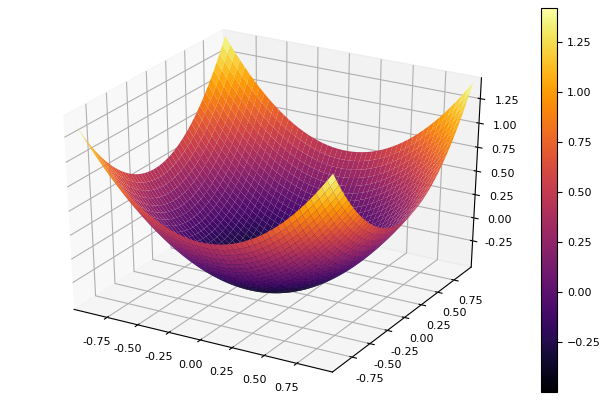

In [220]:
phi0 = phibc[2:N+1,2:N+1]
pyplot()
plot(X,Y,phi0,st=:surface,camera=(30,30))

In [221]:
c = 1.
tau = 0.001

for n = 1:100
for i = 2:N+1
    for j = 2:N+1
        lv = 0.
        cm = 0.
        stc = find_inflow(phibc,i,j,h,c)
            if length(stc) > 0
                for k = 1:length(stc)
                    lv += -1. *(-c)*h*(phibc[stc[k]]-phibc[i,j])/sqrt((phibc[stc[k]]-phibc[i,j])^2)
                    cm += tau*(-1.) *(-c)*h*phibc[stc[k]]*(phibc[stc[k]]-phibc[i,j])/sqrt((phibc[stc[k]]-phibc[i,j])^2)
                    #println(k)
                end
            end
            phibc[i,j] = phibc[i,j]*(1. - (tau/h^2)*lv) + (1/h^2)*cm
    end
end
phibc[1,2:N+1] = phibc[2,2:N+1];
phibc[end,2:N+1] = phibc[end-1,2:N+1];
phibc[2:N+1,1] = phibc[2:N+1,2];
phibc[2:N+1,end] = phibc[2:N+1,end-1];
end    

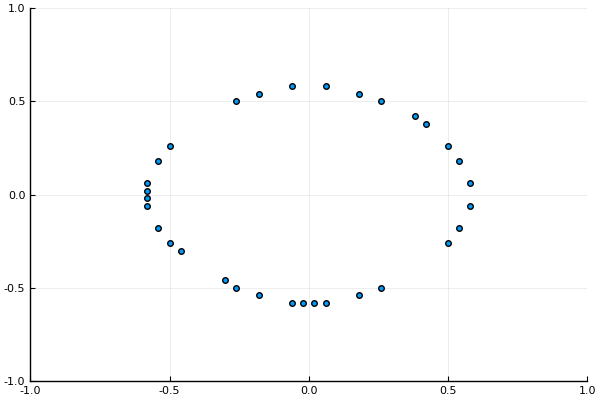

In [222]:
pos = findall(x->abs(x)<0.01,phibc[2:N+1,2:N+1])
scatter(X[pos],Y[pos],legend = false, xlims = (-1,1), ylims = (-1,1))

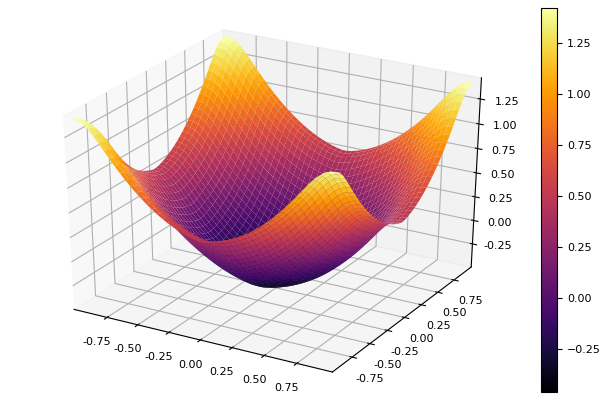

In [223]:
pyplot()
plot(X,Y,phibc[2:N+1,2:N+1],st=:surface,camera=(30,30))

In [41]:
phi = zeros(N+2,N+2)
X = transpose([ -1 + h*(i-1) for i=1:N+1, j = 1:N+1])
Y = [ -1 + h*(i-1) for i=1:N+1, j = 1:N+1];
Xmid = 0.5(X[1:N,1:N]+X[2:N+1,2:N+1])
Ymid = 0.5(Y[1:N,1:N]+Y[2:N+1,2:N+1])
R = rad1[1]*[1 for i = 1:N, j = 1:N]
phi[2:N+1,2:N+1] = Xmid.^2 + Ymid.^2 - R;
#phi[1,2:N+1] = neumann_top(phi,N);
#pyplot()
#plot(Xmid,Ymid,phi,st=:surface,camera=(30,30))

UndefVarError: UndefVarError: rad1 not defined

In [ ]:
for i = 1:length(rad1)
    pos = findall(x->abs(x)<0.01,phi)
    display(scatter(X[pos],Y[pos],legend = false, xlims = (-1,1), ylims = (-1,1)))
    R = rad1[i]*[1 for i = 1:N+1, j = 1:N+1]
    phi = Xmid.^2 + Ymid.^2 - R;
end
#display(plot(X,Y,phi,st=:surface,camera=(30,30)))